In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Informacion sobre vehiculos marca Mercedes Benz

In [2]:
df = pd.read_csv('/home/marcos/Optimizacion/mercedes_benz_listings_cleaned.csv')

In [3]:
df.head()

,Vehicle_Name,Year,Vehicle_Age,Model_Series,Trim_Level,Body_Type,Is_AMG,Is_4MATIC,Mileage_Miles,Mileage_Category,Price_USD,Price_Category,Price_Per_Mile
0,2025 Mercedes-Benz AMG S 63 E 4MATIC,2025,1,AMG S 63,S 63,Other,1,1,9860,Low (< 20K),151900,Luxury (> $70K),15.405680
1,2025 Mercedes-Benz GLE 580 4MATIC,2025,1,GLE,E 580,SUV,0,1,3154,Low (< 20K),82975,Luxury (> $70K),26.307863
2,2025 Mercedes-Benz GLS 450 4MATIC,2025,1,GLS,S 450,SUV,0,1,15496,Low (< 20K),75500,Luxury (> $70K),4.872225
3,2025 Mercedes-Benz GLE 450e 4MATIC,2025,1,GLE,E 450,SUV,0,1,9303,Low (< 20K),67996,Premium ($40K-$70K),7.309040
4,2025 Mercedes-Benz GLE 450e 4MATIC,2025,1,GLE,E 450,SUV,0,1,17259,Low (< 20K),63928,Premium ($40K-$70K),3.704038


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Vehicle_Name      108 non-null    object 
 1   Year              108 non-null    int64  
 2   Vehicle_Age       108 non-null    int64  
 3   Model_Series      108 non-null    object 
 4   Trim_Level        108 non-null    object 
 5   Body_Type         108 non-null    object 
 6   Is_AMG            108 non-null    int64  
 7   Is_4MATIC         108 non-null    int64  
 8   Mileage_Miles     108 non-null    int64  
 9   Mileage_Category  108 non-null    object 
 10  Price_USD         108 non-null    int64  
 11  Price_Category    108 non-null    object 
 12  Price_Per_Mile    108 non-null    float64
dtypes: float64(1), int64(6), object(6)
memory usage: 11.1+ KB


## Regresion Lineal: Relacion año - costo

In [18]:
from sklearn.linear_model import LinearRegression
X = df['Year'].values.reshape(-1, 1)
y = df['Price_USD'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
print(f"Coeficiente: {model.coef_[0][0]:.4f}")
print(f"Intercepto: {model.intercept_[0]:.4f}")



Coeficiente: 3800.9006
Intercepto: -7639620.5638


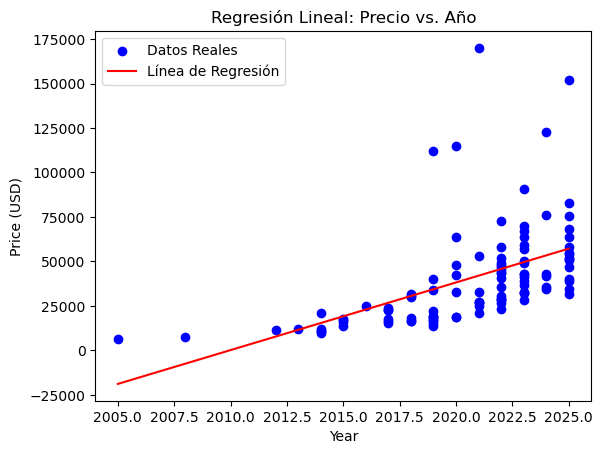

In [6]:
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='Datos Reales')
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
ax.plot(x_line, y_line, color='red', label='Línea de Regresión')
ax.set_xlabel('Year')    
ax.set_ylabel('Price (USD)')
ax.set_title('Regresión Lineal: Precio vs. Año')
ax.legend()
plt.show()

In [11]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
X_log = df['Price_USD'].values.reshape(-1, 1)
y_log = df['Is_AMG'].values
log_model = LogisticRegression()
log_model.fit(X_log, y_log)
print(f"Coeficiente: {log_model.coef_[0][0]:.4f}")
print(f"Intercepto: {log_model.intercept_[0]:.4f}")


Coeficiente: 0.0000
Intercepto: -3.9433


## Regresion losgistica: dado el precio es un AMG?

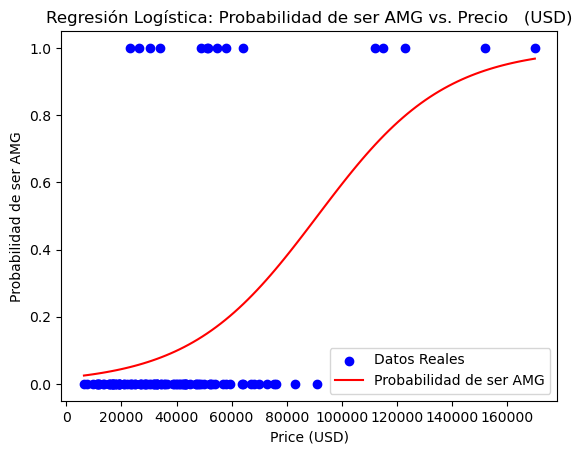

In [ ]:
x_log_line = np.linspace(X_log.min(), X_log.max(), 100).reshape(-1, 1)
y_log_prob = log_model.predict_proba(x_log_line)[:, 1]
fig, ax = plt.subplots()
ax.scatter(X_log, y_log, color='blue', label='Datos Reales')
ax.plot(x_log_line, y_log_prob, color='red', label='Probabilidad de ser AMG')
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Probabilidad de ser AMG')
ax.set_title('Regresión Logística: Probabilidad de ser AMG vs. Precio   (USD)')
ax.legend()
plt.show()

In [14]:
X_s = (X - X.mean()) / X.std()
y_s = (y - y.mean()) / y.std()
X_b = np.c_[np.ones((len(X_s), 1)), X_s]

## Metodos de gradiente

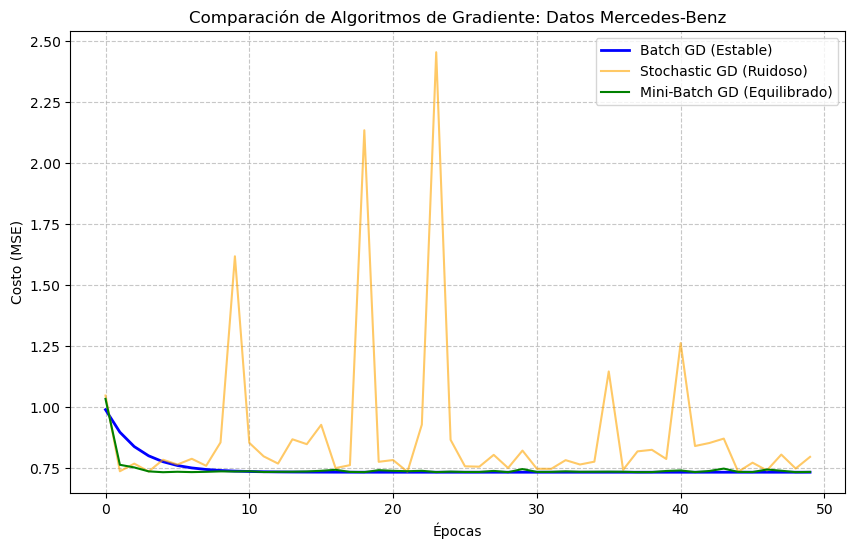

In [17]:
def compute_cost(theta, X, y):
    m = len(y)
    return (1/m) * np.sum(np.square(X.dot(theta) - y))


def run_gradients(X, y, lr=0.1, epochs=50, batch_size=32):
    m = len(y)
    theta_bgd = np.random.randn(2, 1)
    theta_sgd = np.random.randn(2, 1)
    theta_mgd = np.random.randn(2, 1)
    
    cost_bgd, cost_sgd, cost_mgd = [], [], []

    t_b = theta_bgd
    for _ in range(epochs):
        grad = 2/m * X.T.dot(X.dot(t_b) - y)
        t_b = t_b - lr * grad
        cost_bgd.append(compute_cost(t_b, X, y))

    # Stochastic Gradient Descent
    t_s = theta_sgd
    for _ in range(epochs):
        for i in range(m):
            idx = np.random.randint(m)
            xi, yi = X[idx:idx+1], y[idx:idx+1]
            grad = 2 * xi.T.dot(xi.dot(t_s) - yi)
            t_s = t_s - lr * grad
        cost_sgd.append(compute_cost(t_s, X, y))

    # Mini-Batch Gradient Descent
    t_m = theta_mgd
    for _ in range(epochs):
        indices = np.random.permutation(m)
        X_sh, y_sh = X[indices], y[indices]
        for i in range(0, m, batch_size):
            xi, yi = X_sh[i:i+batch_size], y_sh[i:i+batch_size]
            grad = 2/len(xi) * xi.T.dot(xi.dot(t_m) - yi)
            t_m = t_m - lr * grad
        cost_mgd.append(compute_cost(t_m, X, y))
        
    return cost_bgd, cost_sgd, cost_mgd


c_bgd, c_sgd, c_mgd = run_gradients(X_b, y_s)


plt.figure(figsize=(10, 6))
plt.plot(c_bgd, label='Batch GD (Estable)', color='blue', linewidth=2)
plt.plot(c_sgd, label='Stochastic GD (Ruidoso)', color='orange', alpha=0.6)
plt.plot(c_mgd, label='Mini-Batch GD (Equilibrado)', color='green')

plt.xlabel('Épocas')
plt.ylabel('Costo (MSE)')
plt.title('Comparación de Algoritmos de Gradiente: Datos Mercedes-Benz')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()